In [89]:
import numpy as np
import os
import json
import sys
import matplotlib.pyplot as plt
import skimage

sys.path.append("../")
import src.plot as myplot
import seaborn as sns

import sklearn

In [90]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/0_classifier/paper_plots/../src/plot.py'>

In [91]:

import importlib
import src.paper_utils as utils
importlib.reload(utils)

<module 'src.paper_utils' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/0_classifier/paper_plots/../src/paper_utils.py'>

In [92]:
sample_sizes = [10, 100, 500,1000, 2000, 3000,4000,5000]
sample_sizes = [500]
counts_samplesizes, mcms_samplesizes = utils.load_counts_mcm(sample_sizes, letter="", path_format="../Output/sample_sizes")


In [94]:
n_runs = 2
mcm_digit = 0

nr_digits = 10
maxnr_icc = 121

test_probs = np.full((nr_digits, len(sample_sizes), n_runs,nr_digits,maxnr_icc, len(utils.load_test_data(digit=0))), fill_value=-1.0)
for mcm_digit in range(nr_digits):

    for test_digit in range(nr_digits):
        test_data = utils.load_test_data(digit=test_digit)

        for sample_size_idx, sample_size in enumerate(sample_sizes):

            mcms = mcms_samplesizes[sample_size_idx][:n_runs]
            counts_gstar = counts_samplesizes[sample_size_idx][:n_runs]
                
            for run_idx, mcm in enumerate(mcms):
                test_probs[mcm_digit][sample_size_idx][run_idx][test_digit] = utils.probabilities_gstar(mcm[mcm_digit], counts_gstar[run_idx][mcm_digit], test_data, sample_size,smooth=True,return_distr_icc=True)
                

# Find indicative ICC

In [98]:
samples_path = "../OUTPUT/sample_sizes"
mcms_fname = "MCMs_0.json"
counts_fname = "Counts_0.json"
n_samples = sample_sizes[sample_sizes.index(500)] # FIXME 

with open(os.path.join(samples_path,str(n_samples),"MCMs", mcms_fname), "r") as f:
        all_MCM = [np.array(i) for i in json.load(f)] 


with open(os.path.join(samples_path,str(n_samples),"Counts", counts_fname), "r") as f:
        C = json.load(f)
mcm_index = 3

In [99]:
n_variables = 121 #TODO This cell is not trash.
data_path = "../INPUT_all/data/"
data_filename_format = "train-images-unlabeled-{}.dat"
show_digit = 3

# # # for all images in all categories, get the PDF of that all ICC of one MCM fitted to one image
# all_C_icc_x = myplot.calculate_P_icc(C, all_MCM,show_digit,n_variables, data_path,data_filename_format)
# np.save(f"../OUTPUT/sample_sizes/{n_samples}/all_C_icc_{show_digit}.npy", all_C_icc_x)




In [100]:
all_C_icc_x = np.load(f"../OUTPUT/sample_sizes/{n_samples}/all_C_icc_{show_digit}.npy")
mcm3_comms_map = myplot.generate_icc_comms_map(all_MCM[3])
mcm5_comms_map = myplot.generate_icc_comms_map(all_MCM[5])

In [101]:
n_variables = 121
test_data_path = "../INPUT_all/data/testdata_separated"
test_data_filename_format = "test-images-unlabeled-{}.dat"
test_all_C_icc_3 = myplot.calculate_P_icc(C, all_MCM,3,n_variables, test_data_path,test_data_filename_format)


In [102]:
cat_a = 3
cat_b = 5
mcm_idx = 3

all_prob = test_all_C_icc_3/all_C_icc_x.shape[1] # for MCM 0
avg_prob = all_prob.mean(axis=1)

comms3 = myplot.generate_icc_comms_map(all_MCM[3])
distances = utils.normalised_signed_distance_decisionbound(avg_prob, cat_a, cat_b)
dist_map = distances[comms3] # plt.scatter(avg_prob[:,cat_a], avg_prob[:,cat_b])

In [109]:

informative_icc = np.argsort(avg_prob[cat_b,:])


In [119]:
# slice informative icc / or plot all icc 3 vs 5 from MCM 3
# only take first rank values
test_probs[0,0,0,3,informative_icc[0]]

array([0.62300399, 0.62300399, 0.11002994, 0.62300399, 0.62300399,
       0.62300399, 0.11002994, 0.19585828, 0.11002994, 0.19585828,
       0.19585828, 0.19585828, 0.11002994, 0.00823353, 0.19585828,
       0.62300399, 0.19585828, 0.19585828, 0.62300399, 0.62300399,
       0.62300399, 0.19585828, 0.62300399, 0.04815369, 0.62300399,
       0.19585828, 0.19585828, 0.62300399, 0.19585828, 0.19585828,
       0.19585828, 0.11002994, 0.19585828, 0.62300399, 0.11002994,
       0.62300399, 0.62300399, 0.04815369, 0.19585828, 0.62300399,
       0.11002994, 0.19585828, 0.00823353, 0.62300399, 0.19585828,
       0.19585828, 0.19585828, 0.19585828, 0.19585828, 0.04815369,
       0.04815369, 0.62300399, 0.62300399, 0.62300399, 0.01022954,
       0.62300399, 0.62300399, 0.62300399, 0.19585828, 0.62300399,
       0.62300399, 0.11002994, 0.62300399, 0.00424152, 0.62300399,
       0.04815369, 0.11002994, 0.11002994, 0.19585828, 0.62300399,
       0.62300399, 0.04815369, 0.11002994, 0.04815369, 0.62300

/var/folders/z9/j9843dsj2t5dsl2bv81xcwww0000gn/T/ipykernel_6432/889718703.py:21: RuntimeWarning: invalid value encountered in log
  ax.text(.1,.8,f"Our distance {utils.norm_distribution_distance(np.log(test_probs[0,ss_idx,0, seedigit]),np.log(test_probs[1,ss_idx,0, seedigit])).round(2)}", transform=ax.transAxes)
/var/folders/z9/j9843dsj2t5dsl2bv81xcwww0000gn/T/ipykernel_6432/889718703.py:22: RuntimeWarning: invalid value encountered in log
  ax.text(.1,.7,f"TVD {utils.total_variation_distance(np.log(test_probs[0,ss_idx,0, seedigit]),np.log(test_probs[1,ss_idx,0, seedigit])).round(2)}", transform=ax.transAxes)


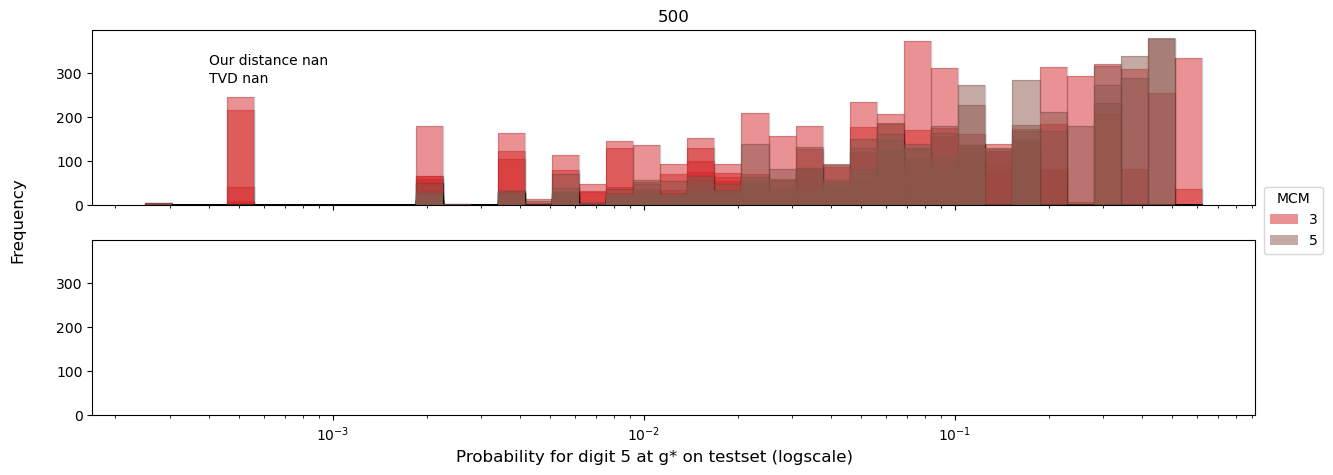

In [121]:

seedigit = 5

colors = myplot.get_list_fromcmap("tab10", N=10)
fig, axs = plt.subplots(2,(len(sample_sizes)+1)//2, figsize=(15,5),sharex=True, sharey=True)
axs = np.ravel(axs)
for ss_idx, sample_size in enumerate(sample_sizes):
    data = test_probs[:,ss_idx,0,informative_icc[1]].T
    # data = test_probs[0,0,0,3,informative_icc[0]]
    data = test_probs[0,0,0,:,informative_icc[0]]

    ax = axs[ss_idx]



    logbins = np.geomspace(data.min(),data.max(), 40)

    for mcm_idx in [3,5]:
        data = test_probs[mcm_idx,ss_idx,0, seedigit].T
        ax.hist(data,bins=logbins, facecolor="None",alpha=.2,edgecolor="black",histtype= "stepfilled")
        ax.hist(data,bins=logbins, label=f'{mcm_idx}',alpha=.5,histtype= "stepfilled",facecolor=colors[mcm_idx])
    ax.text(.1,.8,f"Our distance {utils.norm_distribution_distance(np.log(test_probs[0,ss_idx,0, seedigit]),np.log(test_probs[1,ss_idx,0, seedigit])).round(2)}", transform=ax.transAxes)
    ax.text(.1,.7,f"TVD {utils.total_variation_distance(np.log(test_probs[0,ss_idx,0, seedigit]),np.log(test_probs[1,ss_idx,0, seedigit])).round(2)}", transform=ax.transAxes)

    # if ss_idx == len(sample_sizes)-3:
    #     handles, labels = ax.get_legend_handles_labels()
    #     ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)

    ax.set_title(sample_size)
    ax.set_xscale("log")

handles, labels = ax.get_legend_handles_labels()
leg = fig.legend(handles, labels, loc='center right', ncol=1,bbox_to_anchor=(.95,0.5)) #bbox_to_anchor=(.95,0.5)
leg.set_title("MCM",)

fig.supxlabel(f"Probability for digit {seedigit} at g* on testset (logscale)")

supylabel = fig.supylabel('Frequency')
supylabel.set_x(supylabel.get_position()[0] + 0.05)



plt.show()


